**SpaceX Falcon 9 First Stage Landing Prediction
Assignment: Exploring and Preparing Data**


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.







Falcon 9 first stage will land successfully

Objectives
Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

Exploratory Data Analysis
Preparing Data Feature Engineering

Import Libraries and Define Auxiliary Functions






We will import the following libraries the lab

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
df= pd.read_csv("/content/drive/MyDrive/SPD/DAT.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

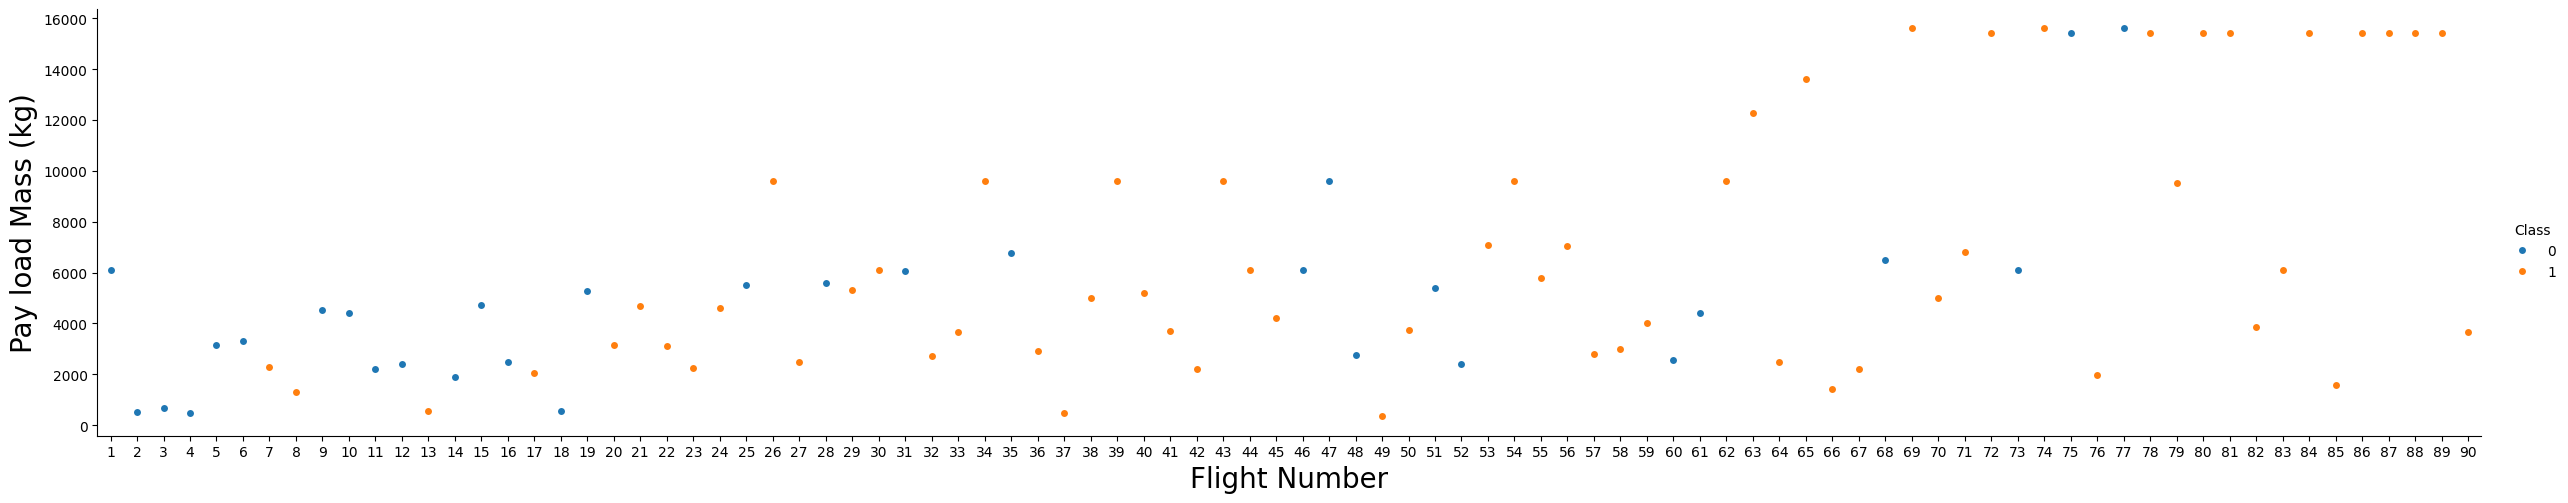

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.







Next, let's drill down to each site visualize its detailed launch records.

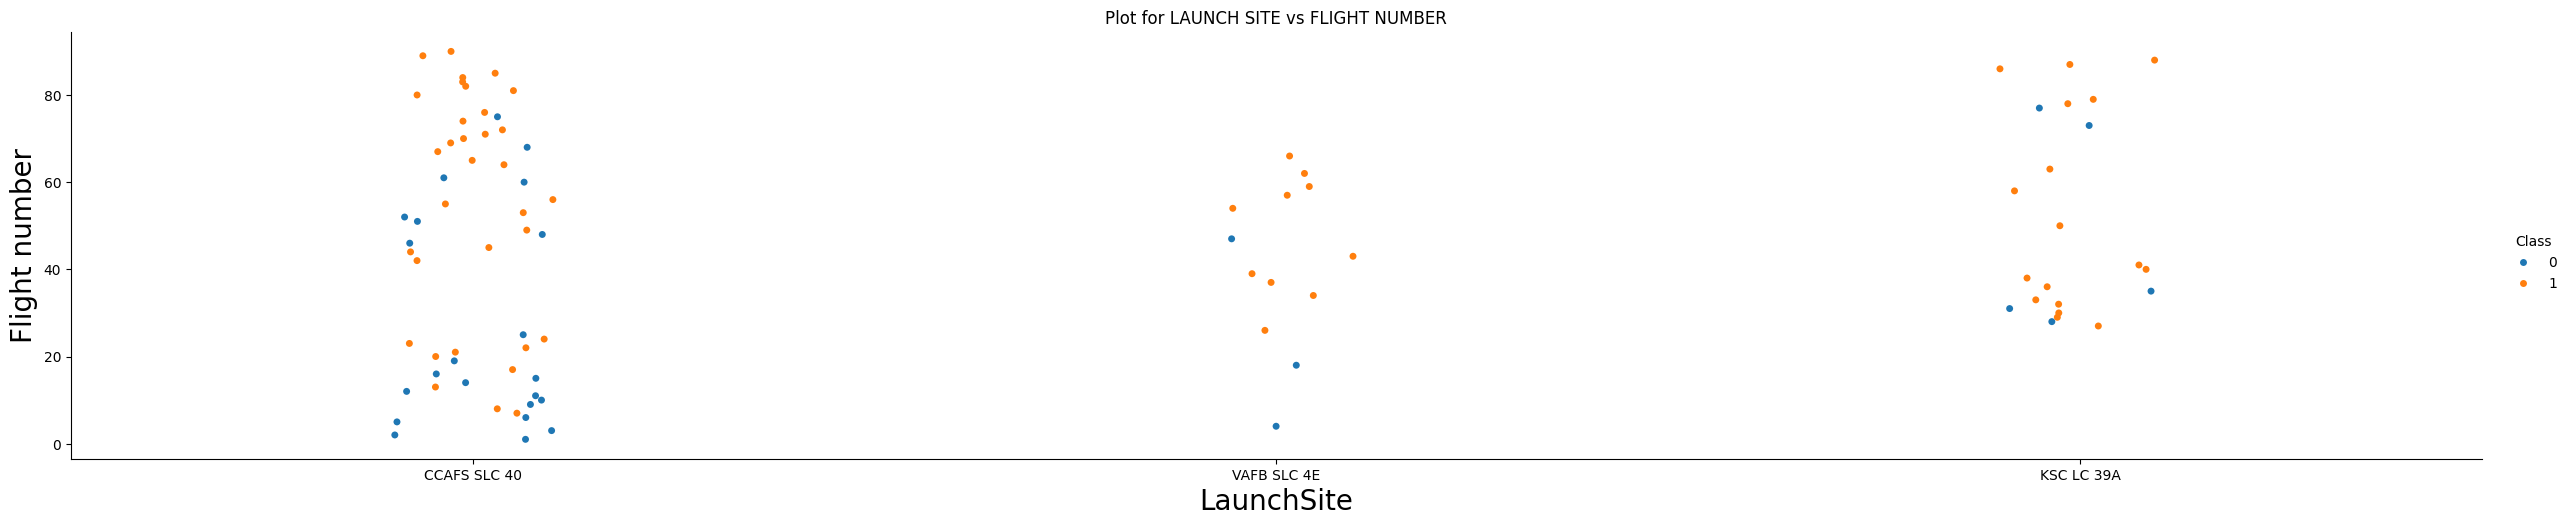

In [11]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.title("Plot for LAUNCH SITE vs FLIGHT NUMBER")
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel('Flight number',fontsize=20)
plt.show()

**Interpretation**
The earliest flights failed mostly and the lastest ones succeeded . The CCAFS SLC 40 site has the majority of the launches other sites have higer success rates .

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

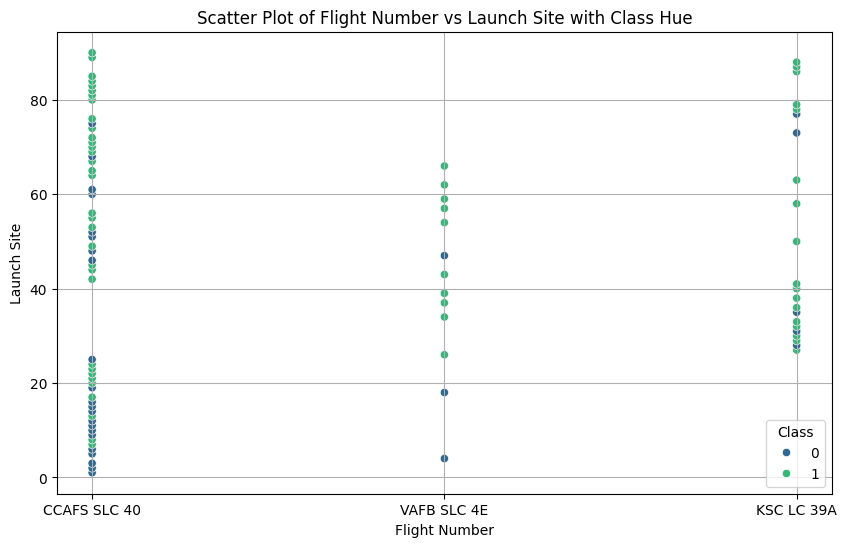

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='viridis')

# Add title and labels
plt.title('Scatter Plot of Flight Number vs Launch Site with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Class')
plt.grid(True)

# Show plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


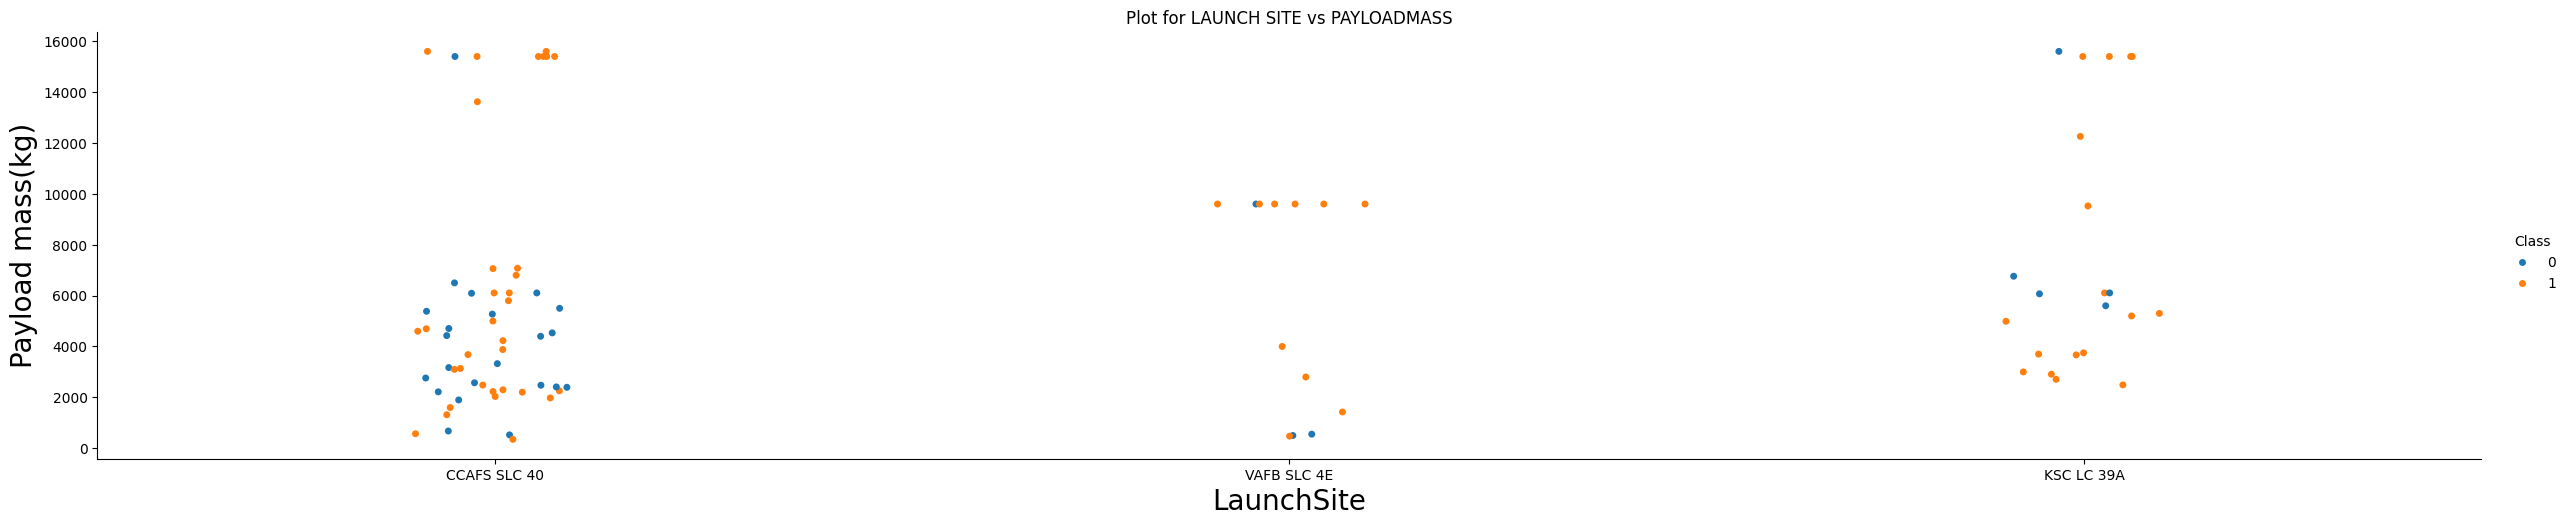

In [13]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.title("Plot for LAUNCH SITE vs PAYLOADMASS")
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel('Payload mass(kg)',fontsize=20)
plt.show()

For any launch site the high success rate is seen with higher payload mass.
KSX LC 39A has higher success rate for mass beloew 5000kg too.

We also want to observe if there is any relationship between launch sites and their payload mass.


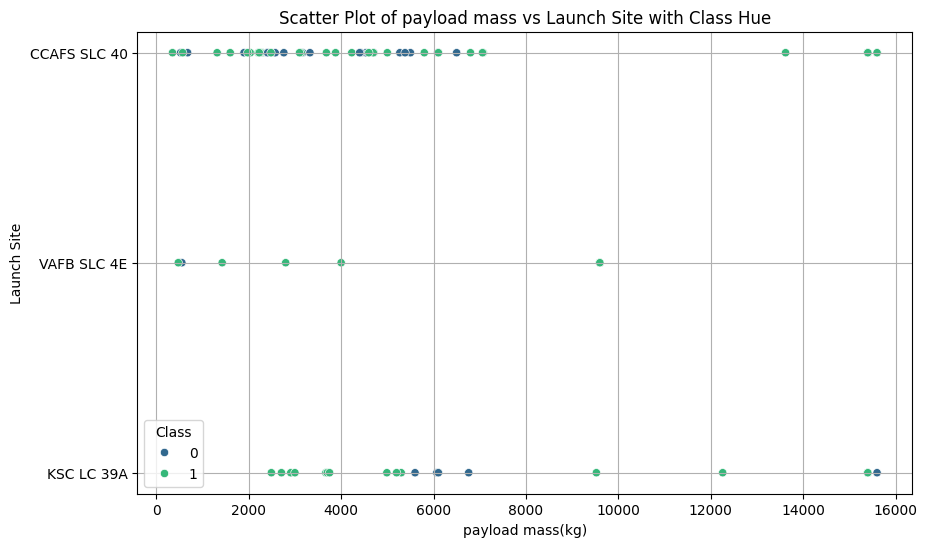

In [14]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis')

# Add title and labels
plt.title('Scatter Plot of payload mass vs Launch Site with Class Hue')
plt.xlabel('payload mass(kg)')
plt.ylabel('Launch Site')
plt.legend(title='Class')
plt.grid(True)

# Show plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000)

<ipython-input-23-dfceb23b302e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Orbit', y="Class",palette='viridis', data=df.groupby('Orbit')['Class'].mean().reset_index(), kind='bar')


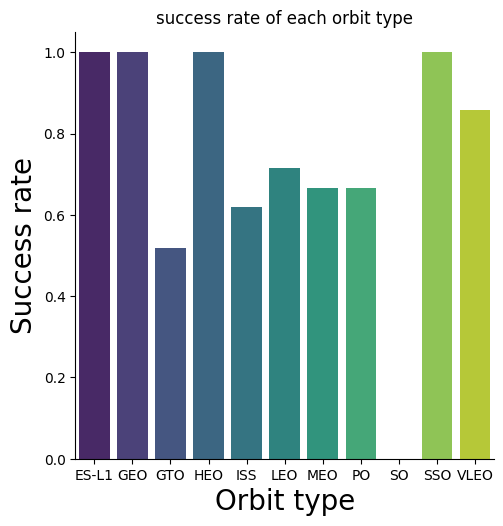

In [23]:
### TASK  3: Visualize the relationship between success rate of each orbit type
sns.catplot(x='Orbit', y="Class",palette='viridis', data=df.groupby('Orbit')['Class'].mean().reset_index(), kind='bar')
plt.title("success rate of each orbit type")
plt.xlabel("Orbit type",fontsize=20)
plt.ylabel('Success rate',fontsize=20)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.

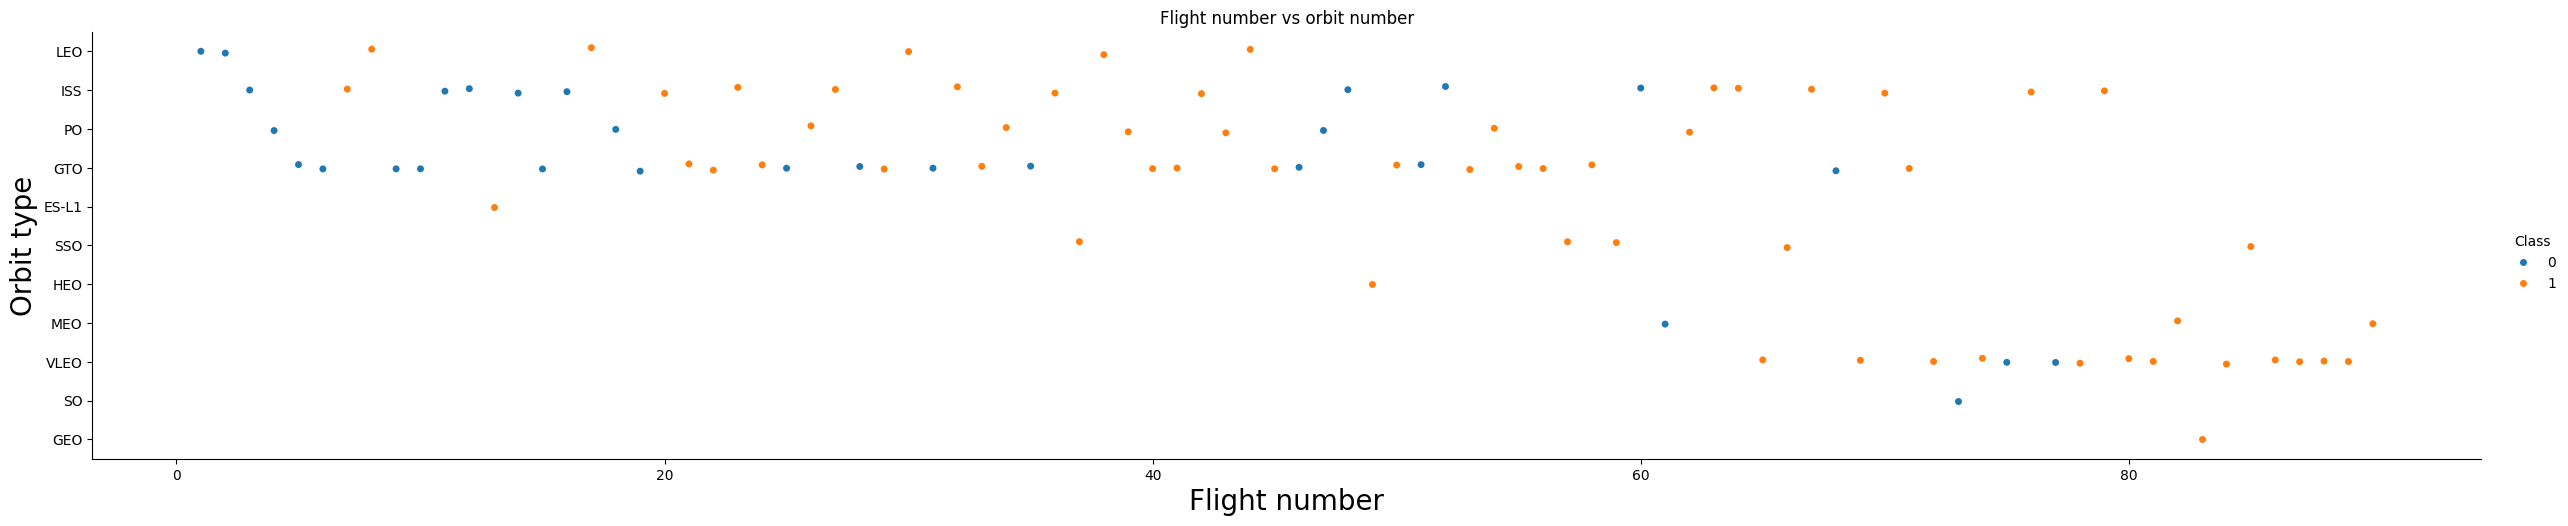

In [28]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(x='FlightNumber', y="Orbit", hue='Class', data=df, aspect=5)
plt.title("Flight number vs orbit number")
plt.xlabel("Flight number",fontsize=20)
plt.ylabel('Orbit type',fontsize=20)
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


There seems to relationship with flight number with certain orbits but it cannot be generalized but there are many successful attempts in higher flight numbers.

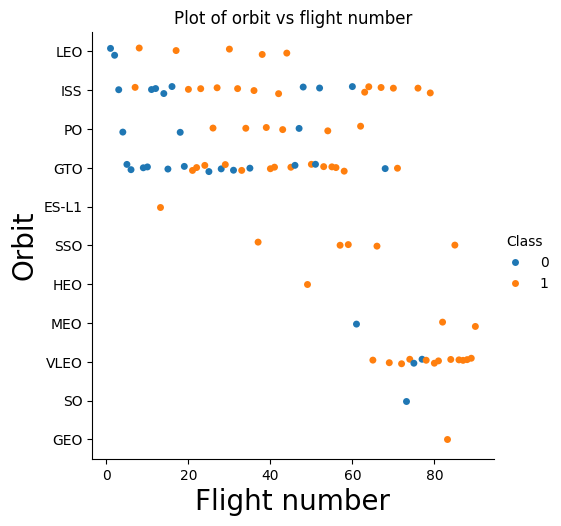

In [32]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y="Orbit",hue='Class', data=df)
plt.title("Plot of orbit vs flight number")
plt.xlabel("Flight number",fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

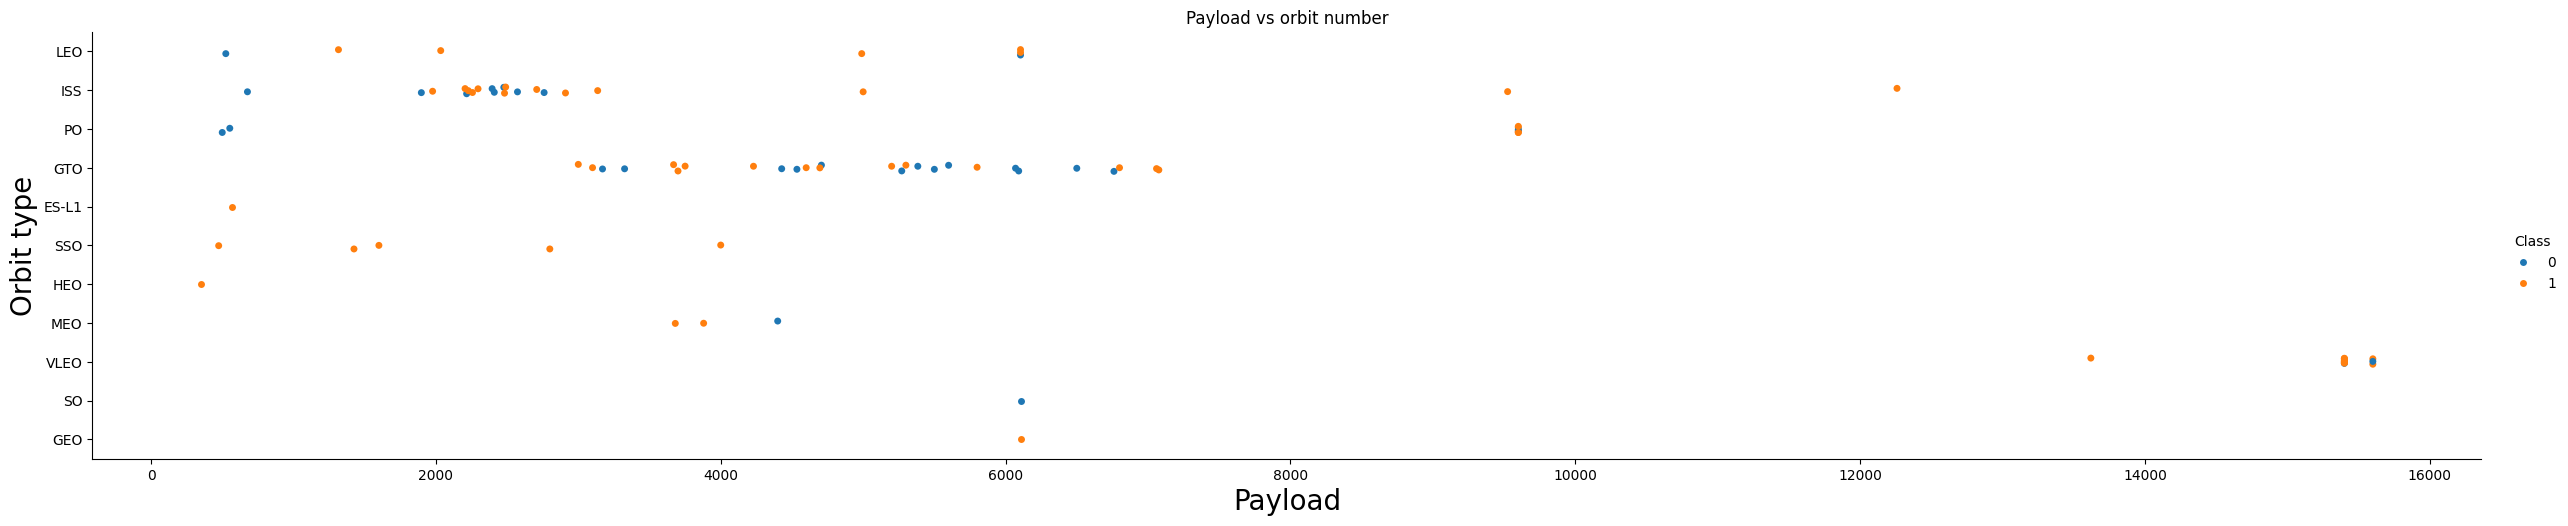

In [34]:
### TASK  5: Visualize the relationship between Payload and Orbit type
sns.catplot(x='PayloadMass', y="Orbit", hue='Class', data=df, aspect=5)
plt.title("Payload vs orbit number")
plt.xlabel("Payload",fontsize=20)
plt.ylabel('Orbit type',fontsize=20)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

payload with higher mass might have low success rates

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.







The function will help you get the year from the date:

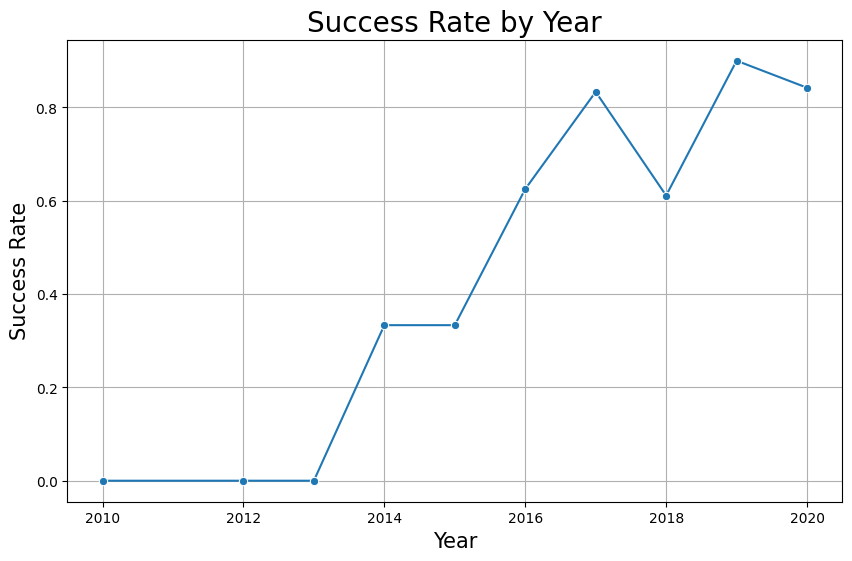

In [45]:

# Step 1: Extract the year from the date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Step 2: Calculate the success rate for each year
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Step 3: Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate_by_year, x='Year', y='Class', marker='o')

# Customize the plot with titles and labels
plt.title("Success Rate by Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.grid(True)

# Show the plot
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [46]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [50]:

# Create dummy variables (one-hot encoding)
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']], dtype=int)

# Display the first few rows of the resulting DataFrame
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
### TASK  7: Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad','Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [52]:
### TASK  8: Cast all numeric columns to `float64`
features_one_hot.astype('float64')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [53]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [55]:
# Step 3: Define the file path and save the DataFrame as a CSV file
file_path = '/content/drive/MyDrive/SPD/DAT3.csv'
features_one_hot.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/MyDrive/SPD/DAT3.csv
